# Statistical Modeling

In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('..', "src")))

from statistical_analysis import ModelPipeline

modeling_pipeline = ModelPipeline()

In [2]:
data = pd.read_csv('../data/processed/cleaned_data.csv')

/tmp/ipykernel_45975/549641924.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/processed/cleaned_data.csv')


In [3]:
data.shape

(1000024, 47)

In [4]:
data.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
# Drop an Unnamed: 0 column
data = data.drop('Unnamed: 0', axis=1)


In [6]:
# Change the type of TransactionMonth to datetime
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

In [7]:
# Add a new column to the data
# data['ClaimsPerPremium'] = data['TotalClaims'] / data['TotalPremium']

In [8]:
data.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000019,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,54.824561,0.0
1000020,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,54.824561,0.0
1000021,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,54.824561,0.0
1000022,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000023,31519,389,2015-02-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [9]:
# Check for missing values
data.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

In [10]:
import category_encoders as ce
import pandas as pd

# Select categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Ensure all values in categorical columns are strings
data[categorical_columns] = data[categorical_columns].astype(str)

# Apply target encoding
encoder = ce.TargetEncoder(cols=categorical_columns)
data_encoded = encoder.fit_transform(data[categorical_columns], data['TotalPremium'])

# Drop the original categorical columns
data = data.drop(categorical_columns, axis=1)

# Concatenate the original data with the encoded data
data = pd.concat([data, data_encoded], axis=1)

data.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,...,NewVehicle,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType
0,145249,12827,2015-03-01,True,1459,44069150.0,2004,6.0,2597.0,130.0,...,14.858717,14.851245,12.175539,12.175539,12.420500,11.233284,11.326444,8.836335,14.865445,14.865445
1,145249,12827,2015-05-01,True,1459,44069150.0,2004,6.0,2597.0,130.0,...,14.858717,14.851245,12.175539,12.175539,12.420500,11.233284,11.326444,8.836335,14.865445,14.865445
2,145249,12827,2015-07-01,True,1459,44069150.0,2004,6.0,2597.0,130.0,...,14.858717,14.851245,12.175539,12.175539,12.420500,11.233284,11.326444,8.836335,14.865445,14.865445
3,145255,12827,2015-05-01,True,1459,44069150.0,2004,6.0,2597.0,130.0,...,14.858717,14.851245,24.061156,25.244505,33.915541,11.233284,11.326444,8.836335,14.865445,14.865445
4,145255,12827,2015-07-01,True,1459,44069150.0,2004,6.0,2597.0,130.0,...,14.858717,14.851245,24.061156,25.244505,33.915541,11.233284,11.326444,8.836335,14.865445,14.865445


In [11]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'PostalCode', 'mmcode', 'RegistrationYear',
       'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors',
       'VehicleIntroDate', 'SumInsured', 'CalculatedPremiumPerTerm',
       'TotalPremium', 'TotalClaims', 'Citizenship', 'LegalType', 'Title',
       'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country',
       'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType',
       'VehicleType', 'make', 'Model', 'bodytype', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')

In [12]:
data.drop(['TransactionMonth', 'VehicleIntroDate'], axis=1, inplace=True)

In [13]:
# Place the target column at the end of the dataframe
data = data[[col for col in data if col != 'TotalPremium'] + ['TotalPremium']]

In [14]:
data.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,...,TermFrequency,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium
0,145249,12827,True,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,14.851245,12.175539,12.175539,12.420500,11.233284,11.326444,8.836335,14.865445,14.865445,21.929825
1,145249,12827,True,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,14.851245,12.175539,12.175539,12.420500,11.233284,11.326444,8.836335,14.865445,14.865445,21.929825
2,145249,12827,True,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,14.851245,12.175539,12.175539,12.420500,11.233284,11.326444,8.836335,14.865445,14.865445,0.000000
3,145255,12827,True,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,14.851245,24.061156,25.244505,33.915541,11.233284,11.326444,8.836335,14.865445,14.865445,54.824561
4,145255,12827,True,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,...,14.851245,24.061156,25.244505,33.915541,11.233284,11.326444,8.836335,14.865445,14.865445,0.000000


In [15]:
# Drop the ClaimsPerPremium column
X = data.drop(['TotalPremium'], axis=1)
y = data['TotalPremium']

In [16]:
X.isnull().sum().sum()

np.int64(0)

In [17]:
y.isnull().sum().sum()

np.int64(0)

In [18]:
# Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800019, 43)
y_train shape: (800019,)
X_test shape: (200005, 43)
y_test shape: (200005,)


In [20]:
# Train the model
modeling_pipeline.train_evaluate_models(X_train, X_test, y_train, y_test)

Training and Evaluation complete


{'Linear Regression': (np.float64(256.1582775843539), 0.4692586529461149),
 'Random Forest Regressor': (np.float64(68.11199777036356),
  0.8588768874147754),
 'XGBoost': (np.float64(156.29379610598258), 0.6761706056750862),
 'Decision Tree Regressor': (np.float64(70.03207232999645),
  0.8548986323771732)}

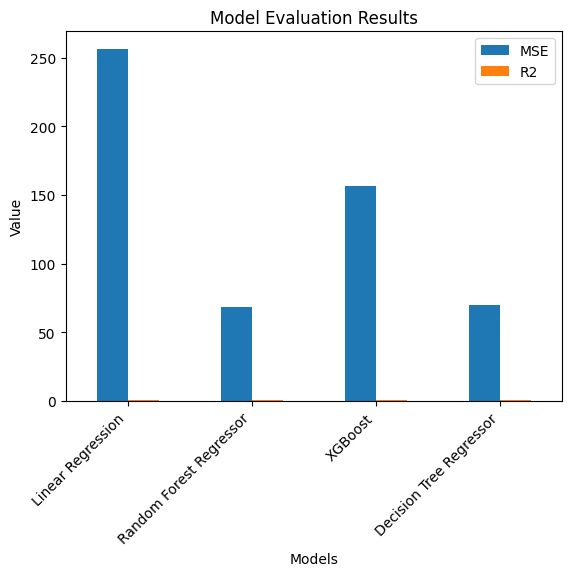

In [21]:
# plot evaluation metrics
modeling_pipeline.plot_evaluation_results()

In [22]:
# Get best model evaluation results
modeling_pipeline.get_best_model_evaluation()

The best model is Linear Regression with an evaluation of (np.float64(256.1582775843539), 0.4692586529461149)


(np.float64(256.1582775843539), 0.4692586529461149)

Feature importances computed using Random Forest Regressor.


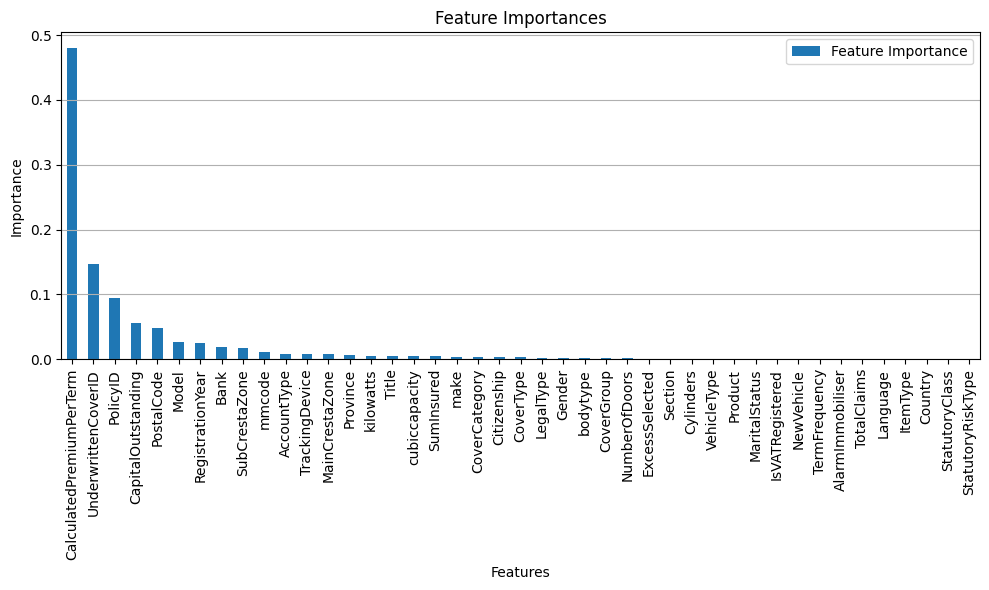

,Feature Importance
CalculatedPremiumPerTerm,0.480217
UnderwrittenCoverID,0.146178
PolicyID,0.095088
CapitalOutstanding,0.056329
PostalCode,0.048050
Model,0.026513
RegistrationYear,0.025064
Bank,0.018496
SubCrestaZone,0.016689
mmcode,0.010419


In [23]:
# Feature importance
modeling_pipeline.feature_importance()

In [ ]:
# Save the best model
modeling_pipeline.save_best_model()